In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
from sklearn.datasets import fetch_california_housing

In [3]:
df = fetch_california_housing()


In [4]:
X = pd.DataFrame(df.data, columns=df.feature_names)

In [5]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [6]:
y = pd.Series(df.target)

In [7]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Length: 20640, dtype: float64

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
parameters = {'criterion': ['mse', 'friedman_mse', 'mae'],
              'max_depth': (2, 5 ,7, 10),
              'min_samples_split': (2, 3, 5, 7, 9),
              'max_features': [None,0.2,0.5,0.8],
              'min_samples_leaf': (1, 3, 5, 7, 9)}
grid_search = GridSearchCV(DecisionTreeRegressor(), parameters, cv=5,scoring='r2')

In [10]:
grid_search.fit(x_train, y_train)

c:\jupyter\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
4000 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2000 fits failed with the following error:
Traceback (most recent call last):
  File "c:\jupyter\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\jupyter\.venv\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\jupyter\.venv\Lib\site-packages\sklearn\base.py", line 471, in _validate_params
    validate_parameter_constra

,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['mse', 'friedman_mse', ...], 'max_depth': (2, ...), 'max_features': [None, 0.2, ...], 'min_samples_leaf': (1, ...), ...}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'friedman_mse'


In [11]:
grid_search.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 9,
 'min_samples_split': 3}

In [12]:
grid_search.best_score_

np.float64(0.7188452928768051)

In [13]:
y_pred = grid_search.predict(x_test)

In [14]:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.7117095947071378
0.37777833543647443


[Text(0.5937984646401985, 0.9545454545454546, 'MedInc <= 5.086\nfriedman_mse = 1.337\nsamples = 16512\nvalue = 2.072'),
 Text(0.3255757599255583, 0.8636363636363636, 'MedInc <= 3.074\nfriedman_mse = 0.834\nsamples = 13101\nvalue = 1.74'),
 Text(0.4596871122828784, 0.9090909090909092, 'True  '),
 Text(0.15601736972704713, 0.7727272727272727, 'AveRooms <= 4.314\nfriedman_mse = 0.561\nsamples = 6268\nvalue = 1.358'),
 Text(0.07537220843672457, 0.6818181818181818, 'MedInc <= 2.215\nfriedman_mse = 0.679\nsamples = 2624\nvalue = 1.626'),
 Text(0.03117245657568238, 0.5909090909090909, 'AveRooms <= 3.422\nfriedman_mse = 0.575\nsamples = 1404\nvalue = 1.377'),
 Text(0.013647642679900745, 0.5, 'AveBedrms <= 1.027\nfriedman_mse = 0.832\nsamples = 482\nvalue = 1.775'),
 Text(0.005583126550868486, 0.4090909090909091, 'Longitude <= -121.825\nfriedman_mse = 0.459\nsamples = 167\nvalue = 1.436'),
 Text(0.0024813895781637717, 0.3181818181818182, 'AveBedrms <= 0.915\nfriedman_mse = 1.416\nsamples = 26\n

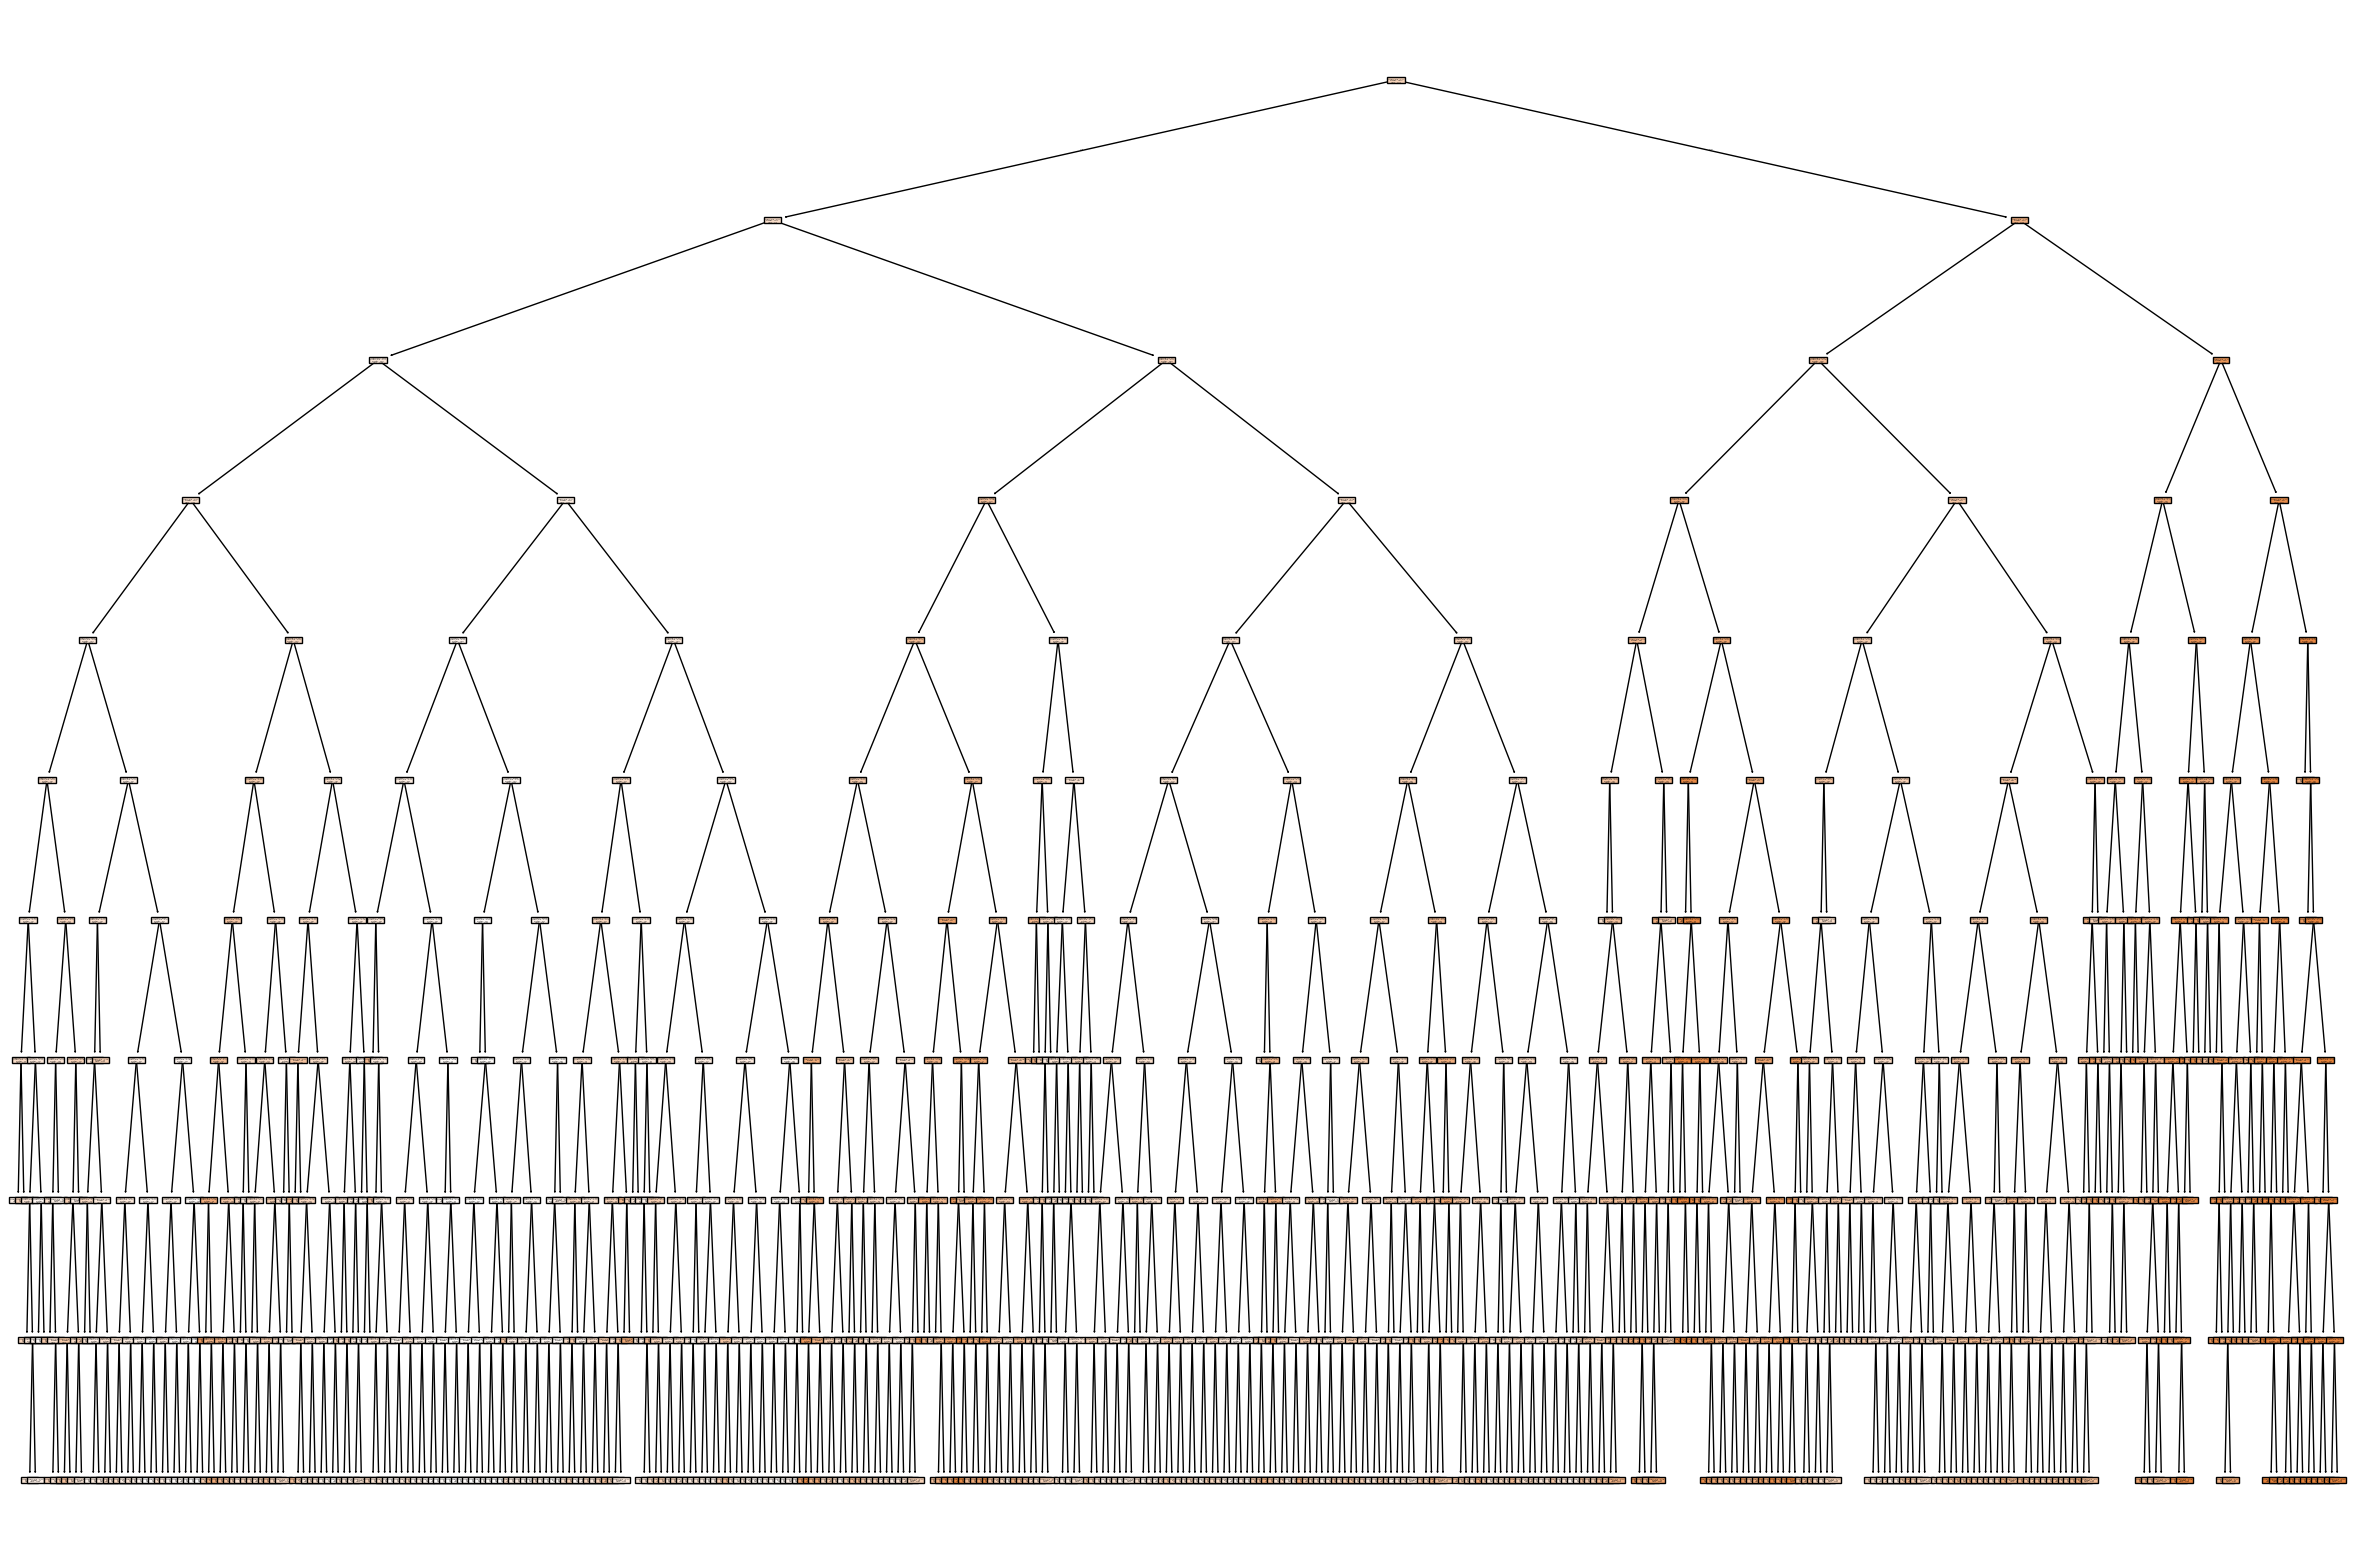

In [15]:
%matplotlib inline
plt.figure(figsize=(30,20), dpi=100)
tree.plot_tree(grid_search.best_estimator_, filled=True, feature_names=X.columns)

**Feature selection**

In [16]:
for name, importance in zip(x_train.columns, grid_search.best_estimator_.feature_importances_):
    print(f"{name}: {importance}")

MedInc: 0.626353302965913
HouseAge: 0.04504768877512679
AveRooms: 0.03671080207723738
AveBedrms: 0.010694065524626229
Population: 0.007838001548370905
AveOccup: 0.13300779850253278
Latitude: 0.07702141454481315
Longitude: 0.06332692606137985
